In [1]:
"""
Notebook for Stock Market Analysis Project, following similar strucuture to data analysis and visualisation 
Udemy Course with my own various additions and amendments. I selected a variety of stock from the NASDAQ index, mainly
focusing on tech related stocks and completing the majority of the analysis, visualisations and comparisons 
on the FANG companies. 

"""

In [121]:
#Adding Python Modules and dependancies 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Modules for visualisation
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Library for reading stock
from pandas_datareader.data import DataReader
import pandas_datareader as pdr

#Libary for timestamps etc
from datetime import datetime

from scipy import stats


In [3]:
#pip install pandas-datareader
#pip install yfinance

In [4]:
#Lists of different stocks from different industries
big_tech_list = ['AAPL','GOOG','MSFT','AMZN']
fang_list = ['FB', 'AMZN', 'NFLX', 'GOOG']
other_tech_list = ['TSLA', 'PYPL', 'SNPS', 'QCOM', 'INTC', 'EA', 'EBAY', 'CSCO','ADBE', 'ATVI']
food_drink_list = ['KHC','SBUX']
#Add more stocks 

#Concatenated list of all stocks 
all_stock_list = big_tech_list + fang_list + other_tech_list + food_drink_list

In [5]:
#Set start and end date to get trend of stock over the past year
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
all_stock_list

['AAPL',
 'GOOG',
 'MSFT',
 'AMZN',
 'FB',
 'AMZN',
 'NFLX',
 'GOOG',
 'TSLA',
 'PYPL',
 'SNPS',
 'QCOM',
 'INTC',
 'EA',
 'EBAY',
 'CSCO',
 'ADBE',
 'ATVI',
 'KHC',
 'SBUX']

In [7]:
#Iterate through stock lists and set the stock label as a global dataframe variable and create a dictionary of stock dataframes
big_tech_list_dict = {} 
for stock in big_tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) 
    big_tech_list_dict[stock] = globals()[stock] = DataReader(stock, 'yahoo', start, end)

fang_list_dict = {}
for stock in fang_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,end)
    fang_list_dict[stock] = globals()[stock] = DataReader(stock, 'yahoo', start, end)

 
#all stocks as global variables
#all_stock_list_dict = {} 
#for stock in all_stock_list:
  #  globals()[stock] = DataReader(stock,'yahoo',start,end) 
#    all_stock_list_dict[stock] = globals()[stock] = DataReader(stock, 'yahoo', start, end)


In [8]:
fang_list_dict['FB'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,189.500000,184.410004,185.009995,189.009995,29459900,189.009995
2019-06-18,194.529999,187.279999,194.000000,188.470001,37571400,188.470001
2019-06-19,188.100006,184.550003,187.000000,187.479996,21417100,187.479996
2019-06-20,191.160004,187.639999,190.949997,189.529999,14635700,189.529999
2019-06-21,192.000000,188.750000,188.750000,191.139999,22751200,191.139999


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-06-17 to 2020-06-15
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


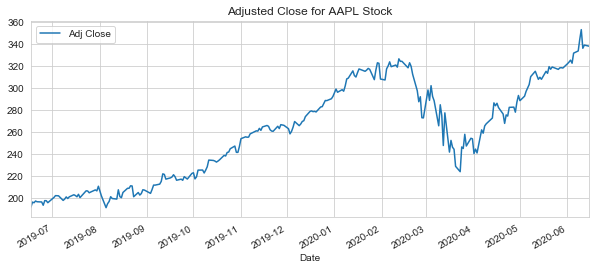

In [10]:
#Plot trend for adjusted close price of Apple Stock over the past 365 days
AAPL['Adj Close'].plot(legend = True, figsize=(10,4), title = 'Adjusted Close for AAPL Stock',kind='line')

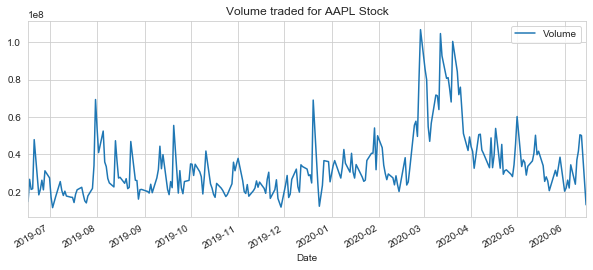

In [11]:
#Plot trend of volume of Apple stock traded over the past 365 days
AAPL['Volume'].plot(legend = True, figsize=(10,4), title = 'Volume traded for AAPL Stock',kind='line')

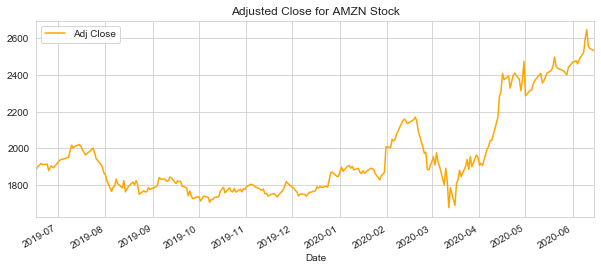

In [80]:
#Plot trend for adjusted close price of Amazon Stock over the past 365 days
AMZN['Adj Close'].plot(legend = True, figsize=(10,4), title = 'Adjusted Close for AMZN Stock',kind='line', color='orange')

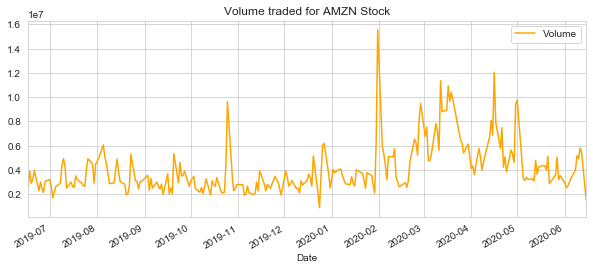

In [81]:
#Plot trend for volume of Amazon Stock traded over the past 365 days
AMZN['Volume'].plot(legend = True, figsize=(10,4), title = 'Volume traded for AMZN Stock',kind='line', color='orange')

Text(0.5, 1.0, 'Adjusted Close for FANG Stock')

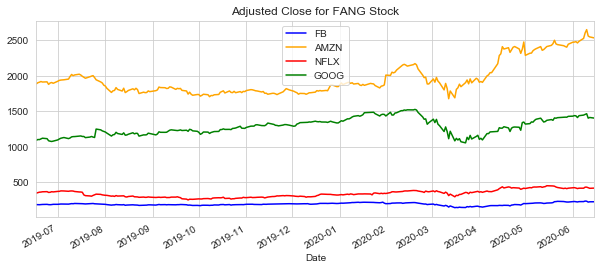

In [86]:
#Adjusted close for FANG Stock

cols = {"FB":'blue', "AMZN":'orange',"NFLX":'red', "GOOG": 'green'}
FB['Adj Close'].plot(legend = True, figsize=(10,4),kind='line', label ='FB',color=cols['FB'])
AMZN['Adj Close'].plot(legend = True, figsize=(10,4),kind='line', label='AMZN', color=cols['AMZN'])
NFLX['Adj Close'].plot(legend = True, figsize=(10,4),kind='line', label = 'NFLX', color=cols['NFLX'])
GOOG['Adj Close'].plot(legend = True, figsize=(10,4),kind='line', label = 'GOOG', color=cols['GOOG'])
plt.title('Adjusted Close for FANG Stock')


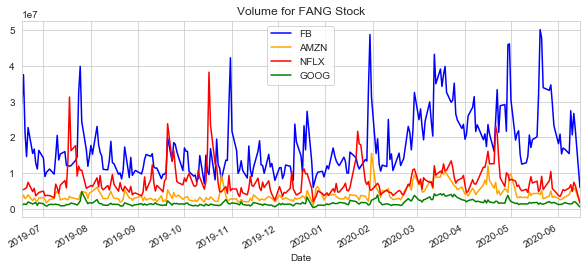

In [87]:
#Volume traded for FANG Stock
FB['Volume'].plot(legend = True, figsize=(10,4), title = 'Volume for FANG Stock',kind='line', label='FB',color=cols['FB'])
AMZN['Volume'].plot(legend = True, figsize=(10,4),kind='line', label = 'AMZN', color=cols['AMZN'])
NFLX['Volume'].plot(legend = True, figsize=(10,4),kind='line', label = 'NFLX', color=cols['NFLX'])
GOOG['Volume'].plot(legend = True, figsize=(10,4),kind='line', label = 'GOOG', color=cols['GOOG'])

In [89]:
#Get list of all keys in big tech list dictionary
key_list = big_tech_list_dict.keys()

In [90]:
key_list

dict_keys(['AAPL', 'GOOG', 'MSFT', 'AMZN'])

In [91]:
big_tech_list_dict['AAPL'].head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2019-06-17,194.960007,192.169998,192.899994,193.889999,14669100.0,191.603317,NaN,NaN,NaN,NaN,NaN
2019-06-18,200.289993,195.210007,196.050003,198.449997,26551000.0,196.109528,NaN,NaN,NaN,NaN,0.023518
2019-06-19,199.880005,197.309998,199.679993,197.869995,21124200.0,195.536377,NaN,NaN,NaN,NaN,-0.002923
2019-06-20,200.610001,198.029999,200.369995,199.460007,21514000.0,197.107620,NaN,NaN,NaN,NaN,0.008036
2019-06-21,200.850006,198.149994,198.800003,198.779999,47800600.0,196.435623,NaN,NaN,NaN,NaN,-0.003409


In [92]:
#Calculate moving averages/moving mean/rolling mean over period of 10 - 100 days for big tech and FANG list
ma_day = [10,20,50,100]

#Iterate through keys of big tech and fang list, calculating and appending moving averages column for respective time period 
for ma in ma_day:
    for key in big_tech_list_dict.keys():
        for fang_key in fang_list_dict.keys():
        
            column_name = "MA for %s days" %(str(ma))
    
            big_tech_list_dict[key][column_name] = big_tech_list_dict[key]['Adj Close'].dropna().rolling(ma).mean()
            fang_list_dict[fang_key][column_name] = fang_list_dict[fang_key]['Adj Close'].dropna().rolling(ma).mean()
            #all_stock_list_dict[key][column_name] = all_stock_list_dict[key]['Adj Close'].dropna().rolling(ma).mean()
            #AAPL[column_name] = AAPL['Adj Close'].dropna().rolling(ma).mean()


In [94]:
fang_list_dict['FB'].tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2020-06-09,239.770004,230.410004,231.520004,238.669998,27462900,238.669998,230.161000,224.652001,200.054401,196.507201,0.031417
2020-06-10,241.210007,235.279999,240.960007,236.729996,20720700,236.729996,230.920000,225.983501,201.470001,196.656801,-0.008128
2020-06-11,232.889999,223.550003,229.940002,224.429993,26708200,224.429993,230.816998,226.950000,202.622601,196.679700,-0.051958
2020-06-12,231.660004,224.500000,229.899994,228.580002,22071700,228.580002,231.165999,228.038500,204.002201,196.751100,0.018491
2020-06-15,230.300003,224.800003,225.089996,229.085007,5996991,229.085007,230.883499,228.948750,205.420101,196.828750,0.002209


Text(0.5, 1.0, 'Moving Averages of Facebook Stock')

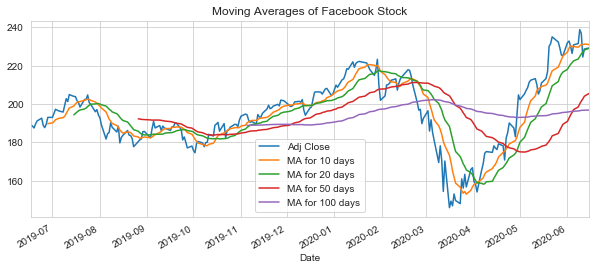

In [95]:
#Plot Moving averages of Facebook Stocks from period of 10 days to 100 days
fang_list_dict['FB'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots = False, figsize = (10,4))
plt.title('Moving Averages of Facebook Stock')

Text(0.5, 1.0, 'Moving Averages of Netflix Stock')

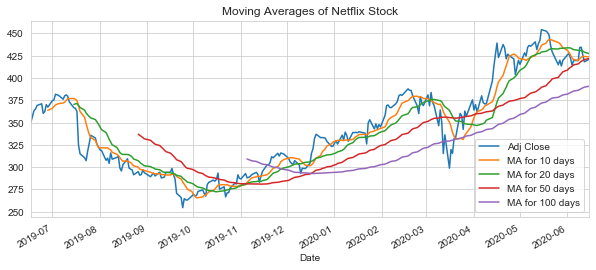

In [96]:
#Plot Moving averages of NFLX Stocks from period of 10 days to 100 days
fang_list_dict['NFLX'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots = False, figsize = (10,4))
plt.title('Moving Averages of Netflix Stock')

In [98]:
#Calculating Daily Returns for big tech and fang dictionaries
#Iterate through keys of dictionary, calculating the % change of Adjusted close column and append to new Daily Return column

for key in big_tech_list_dict.keys():
    for fang_key in fang_list_dict.keys():
        column_name = "Daily Return"
        big_tech_list_dict[key][column_name] = big_tech_list_dict[key]['Adj Close'].pct_change()
        fang_list_dict[fang_key][column_name] = fang_list_dict[fang_key]['Adj Close'].pct_change()
        #all_stock_list_dict[key][column_name] = all_stock_list_dict[key]['Adj Close'].pct_change()


Text(0, 0.5, '% change')

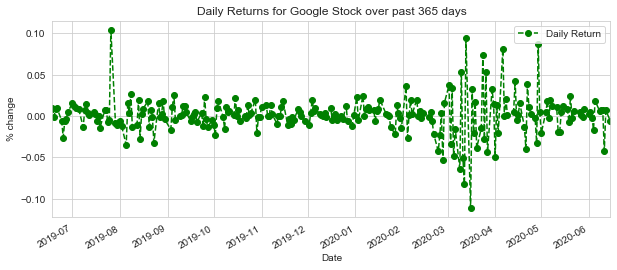

In [101]:
#Plot Daily Returns for GOOG stock over past 365 days
fang_list_dict['GOOG']['Daily Return'].dropna().plot(figsize = (10,4), legend = True, linestyle= '--', marker = 'o', color ='green')
plt.title('Daily Returns for Google Stock over past 365 days')
plt.ylabel('% change')

Text(0.5, 1.0, 'Distribution of daily returns for Amazon Stock over past 365 days')

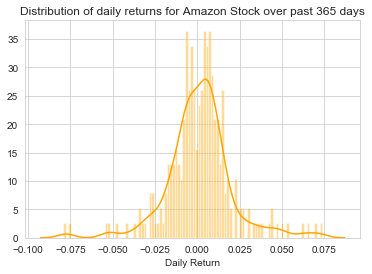

In [102]:
#Plot distribution of daily returns of AMZN stock over past 365 days
sns.distplot(fang_list_dict['AMZN']['Daily Return'].dropna(), bins=100, color = cols['AMZN'])
plt.title('Distribution of daily returns for Amazon Stock over past 365 days')

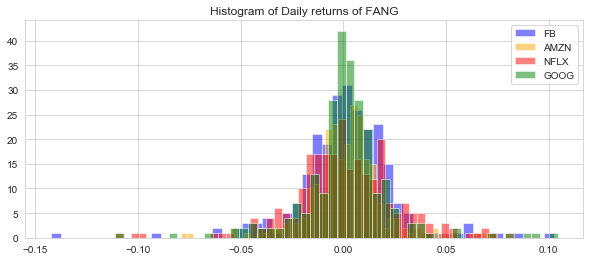

In [109]:
#Plot histograms for daily returns of FANG stock over past 365 days 
fang_list_dict['FB']['Daily Return'].hist(bins =50, color = cols['FB'], alpha =.5, figsize=(10,4))
fang_list_dict['AMZN']['Daily Return'].hist(bins =50, color = cols['AMZN'], alpha =.5)
fang_list_dict['NFLX']['Daily Return'].hist(bins =50, color = cols['NFLX'], alpha =.5)
fang_list_dict['GOOG']['Daily Return'].hist(bins =50, color = cols['GOOG'], alpha =.5)
plt.title('Histogram of Daily returns of FANG')
plt.legend(fang_list_dict)

In [110]:
#DataFrame created that holds all the adjusted close values for each FANG stock
close_df = DataReader(fang_list, 'yahoo', start, end)['Adj Close'].dropna()
#closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']    

In [111]:
close_df.head()

Symbols,AMZN,FB,GOOG,NFLX
Date,,,,
2019-06-17,1886.030029,189.009995,1092.500000,350.619995
2019-06-18,1901.369995,188.470001,1103.599976,357.119995
2019-06-19,1908.790039,187.479996,1102.329956,363.519989
2019-06-20,1918.189941,189.529999,1111.420044,365.209991
2019-06-21,1911.300049,191.139999,1121.880005,369.209991


In [112]:
#tech_ret = closing_df.pct_change()
#tech_ret.head()

#new DF fang_ret created that holds the % change of the adjusted close values for each FANG stock
fang_ret = close_df.pct_change()
fang_ret.head()

Symbols,AMZN,FB,GOOG,NFLX
Date,,,,
2019-06-17,NaN,NaN,NaN,NaN
2019-06-18,0.008133,-0.002857,0.010160,0.018539
2019-06-19,0.003902,-0.005253,-0.001151,0.017921
2019-06-20,0.004925,0.010935,0.008246,0.004649
2019-06-21,-0.003592,0.008495,0.009411,0.010953


In [124]:
#Function used to calculate the Pearson Correlation Coefficient for the below sns.pairplot
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    

/Users/adammckenna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


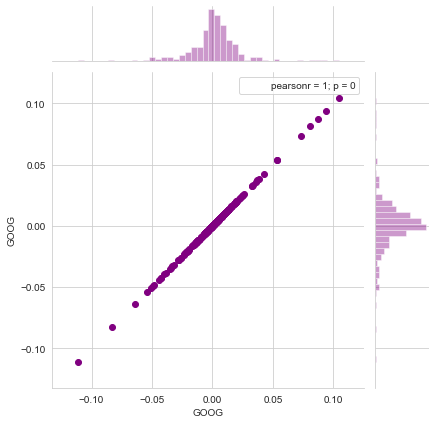

In [125]:
#Joint scatter plot shows the relationship & correlation b/w 2 different stocks  
#GOOG against GOOG is directly proporitonal as shown by Pearson correlation coefficient value of +1 

plot = sns.jointplot('GOOG','GOOG', fang_ret, kind = 'scatter', color = 'purple')
plot.annotate(stats.pearsonr)

/Users/adammckenna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


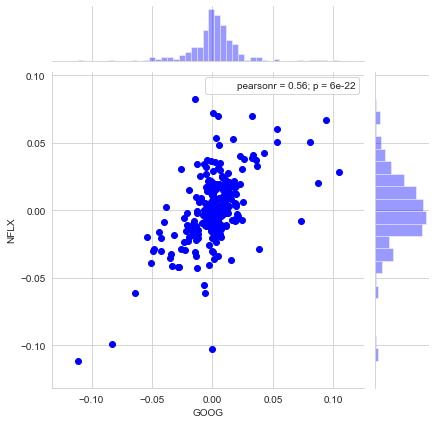

In [128]:
#Joint scatter plot shows the relationship & correlation b/w 2 different stocks  
#GOOG and NFLX stocks are slighltly correlated as show by positive pearsonr value 
#but they mainly centre around 0 for each, as is the trend with adjusted close

plot = sns.jointplot('GOOG','NFLX', fang_ret, kind = 'scatter', color = 'blue')
plot.annotate(stats.pearsonr)

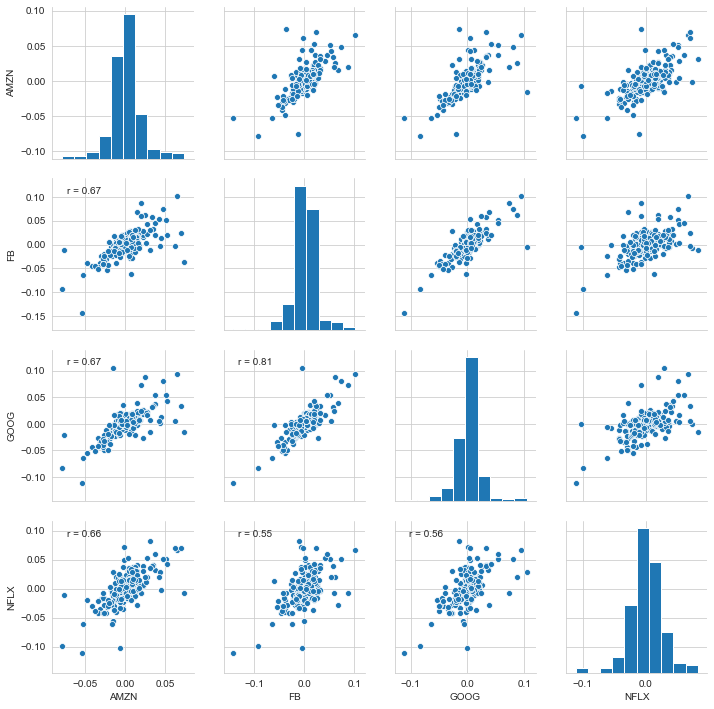

In [127]:
#Pairplot shows scatter plots for each FANG stock against every other FANG stock, showing their r/ship and correlation 
#Most stock comparisons show a somewhat positive correlation b/w the 2 stocks but most of the values centre around 0, as expected with adjusted close
#FB vs GOOG/GOOG vs FB comparison seems to be the most positively correlated, this is confirmed by the highest pos pearsonr value of 0.81

plot = sns.pairplot(fang_ret.dropna())
plot.map_lower(corrfunc)
###Fix PearsonR value, not showing on all scatter plots :/ 

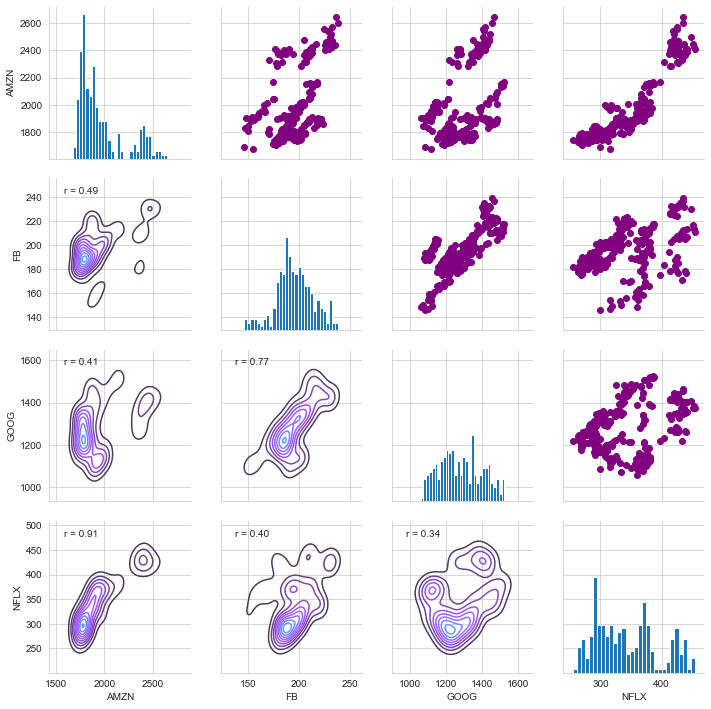

In [131]:
#PairGrid used to compare each FANG stock against each other, similar to pairplot
#Grid displays the scatter and Kernel Density Estimation (KDE) plots
#Pearsonr value shows the level of correlation b/w the 2 stocks, FB vs GOOG seems to be the most positively correlated

#returns_fig = sns.PairGrid(fang_ret.dropna())
returns_fig = sns.PairGrid(close_df)
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins = 30)
returns_fig.map_lower(corrfunc)

In [133]:
#Rets dataframe stores the daily returns for each FANG stock, NaN values are removed
rets = fang_ret.dropna()

In [134]:
rets.head()

Symbols,AMZN,FB,GOOG,NFLX
Date,,,,
2019-06-18,0.008133,-0.002857,0.010160,0.018539
2019-06-19,0.003902,-0.005253,-0.001151,0.017921
2019-06-20,0.004925,0.010935,0.008246,0.004649
2019-06-21,-0.003592,0.008495,0.009411,0.010953
2019-06-24,0.001360,0.007638,-0.005669,0.004957


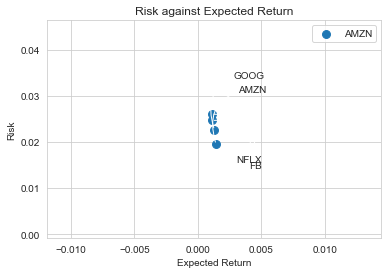

In [135]:
#Creating scatterplot for FANG stocks for their expected return and assoiciated risk
plt.scatter(rets.mean(), rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Risk against Expected Return')

area = np.pi*20
for label, x, y, i in zip(rets.columns, rets.mean(), rets.std(), range(len(rets.columns))):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50*(-1)**i),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.6'))
plt.legend(rets.columns)

###Fix Legend

Text(0.5, 1.0, 'Daily Returns for FB Stock')

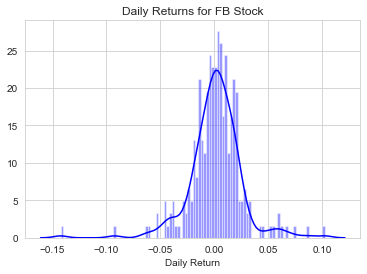

In [136]:
#Plot showing the distribution of the daily returns on Facebook stock
sns.distplot(FB['Daily Return'].dropna(), bins = 100, color = 'blue')
plt.title('Daily Returns for FB Stock')

In [49]:
#Calculating 95th quantile for daily returns on Amazon stock
#with 95% confidence / 95% of the time, the worst daily lost will not exceed the -0.028 * 100 (-2.28%)
#with $1,000,000 investment, one-day 5% VaR (value at risk) is -0.028 * 1,000,000 = -2.28% =VaR (max value lost)
rets['AMZN'].quantile(0.05)


-0.02766398876796805

In [ ]:
"""
Using Monte Carlo Simulation method for predicting future stock prices and associated risk.
Monte Carlo simulation attempts to predict the worst likely loss for a portfolio given a confidence interval 
over a specified time period.
Geometric Brownian Motion is calculated, which means that the stock price follows a random walk and is consistent with the
weak form of the efficent market hypothesis (EMH) - meaning the past price info is already incorported and the next
price movement is conditionally independat of past price movements.

GBM Equation:

ΔS/s  = μΔt + σϵ√Δt

where:
S=the stock price
ΔS=the change in stock price
μ=the expected return
σ=the standard deviation of returns
ϵ=the random variable
Δt=the elapsed time period

ΔS = S × (μΔt + σϵ√Δt) 

"""

In [51]:
rets.head()

Symbols,AMZN,FB,GOOG,NFLX
Date,,,,
2019-06-18,0.008133,-0.002857,0.010160,0.018539
2019-06-19,0.003902,-0.005253,-0.001151,0.017921
2019-06-20,0.004925,0.010935,0.008246,0.004649
2019-06-21,-0.003592,0.008495,0.009411,0.010953
2019-06-24,0.001360,0.007638,-0.005669,0.004957


In [137]:
#Using Monte Carlo Simulation on Netflix Stock

days = 365

dt = 1/days

mu = rets.mean()['NFLX']

sigma = rets.std()['NFLX']

def stock_monte_carlo(start_price, days, mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x])) 
        
    return price 

In [138]:
#Get starting price of Netflix Stock from stock DF, first High entry will be the starting price for simulation
starting_price = NFLX['High'][0]

In [139]:
starting_price

351.7699890136719

<function matplotlib.pyplot.close(fig=None)>

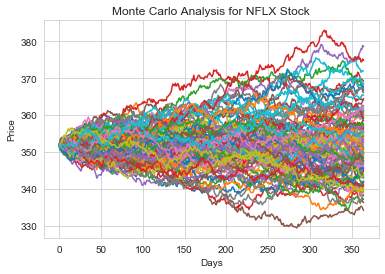

In [140]:
#Running 100 Monte Carlo simulations on NFLX
for run in range(100):
    plt.plot(stock_monte_carlo(starting_price, days, mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for NFLX Stock')
plt.close

<function matplotlib.pyplot.close(fig=None)>

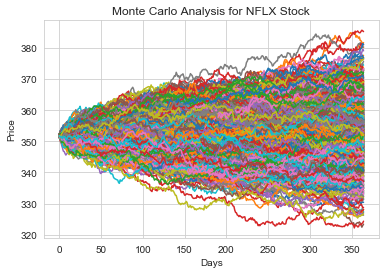

In [141]:
#Running 1000 Monte Carlo simulations on NFLX
for run in range(1000):
    plt.plot(stock_monte_carlo(starting_price, days, mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for NFLX Stock')
plt.close

In [142]:
#Running 10000 Monte Carlo simulations on NFLX
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
        simulations[run] = stock_monte_carlo(starting_price, days, mu,sigma)[days-1]

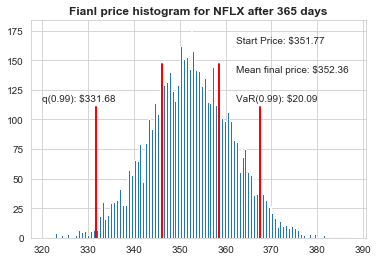

In [143]:
#Getting 1st, 25th, 75th and 95th percentiles
q = np.percentile(simulations,1)
q2 = np.percentile(simulations,25)
q3 = np.percentile(simulations,75)
q4 = np.percentile(simulations,95)

#Plotting histogram of distribution of Monte Carlo Similulations on NFLX Stock
plt.hist(simulations, bins = 200)

plt.figtext(0.6,0.8,s = "Start Price: $%.2f" %starting_price)
plt.figtext(0.6,0.7, "Mean final price: $%.2f "%simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (starting_price-q,))
plt.figtext(0.15,0.6,"q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=2, color = 'r', ymax = 0.6)
plt.axvline(x=q2, linewidth=2, color = 'r', ymax = 0.8)
plt.axvline(x=q3, linewidth=2, color = 'r', ymax = 0.8)
plt.axvline(x=q4, linewidth=2, color = 'r', ymax = 0.6)

plt.title(u"Fianl price histogram for NFLX after %s days" % days, weight ='bold');
#VaR = 20.07, 99% of the time that simulation is run, the amount of money that will be lost at most will be 20.07, 99% of the tine

Text(0.5, 0, 'Price')

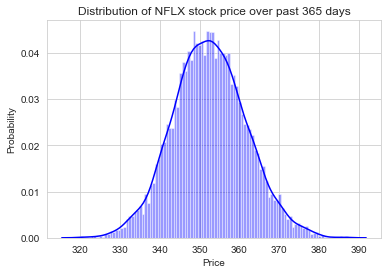

In [79]:
#Distribution plot of NFLX Simulations
sns.distplot(simulations, bins = 100, color = 'blue')
plt.title('Distribution of NFLX stock price over past 365 days')
plt.ylabel('Probability')
plt.xlabel('Price')


In [ ]:
**Add interactive widgets 
**Add some more sns and plt visualisations 